# Boyut İndirgeme

### Bir veri setinin yüksek boyutlu bir uzaydan daha düşük bir boyutlu uzaya anlamanı kabul edilebilir oranda kaybedecek şekilde dönüştürülmedir.

## 1. PCA (Principle Component Analysis) (Temel Bileşen Analizi)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA # PCA kütüphanesinin import ediyoruz

In [2]:
trn = pd.read_csv('https://raw.githubusercontent.com/yasarkucukefe/YBS_405/main/data/optdigits_trn.csv')

In [3]:
trn.head()

,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P55,P56,P57,P58,P59,P60,P61,P62,P63,y
0,0,0,0,16,6,0,0,0,0,0,...,0,0,0,0,10,13,0,0,0,1
1,0,0,4,16,14,0,0,0,0,0,...,0,0,0,6,16,16,16,4,0,1
2,0,0,12,10,0,0,0,0,0,3,...,3,0,0,9,16,16,16,16,9,1
3,0,0,0,6,16,3,0,0,0,0,...,0,0,0,1,8,12,15,13,1,6
4,0,0,11,12,7,0,0,0,0,0,...,0,0,0,8,10,8,0,0,0,1


In [4]:
X_trn = trn.filter(regex='\d')
y_trn = trn.y

In [5]:
X_trn.head()

,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P54,P55,P56,P57,P58,P59,P60,P61,P62,P63
0,0,0,0,16,6,0,0,0,0,0,...,0,0,0,0,0,10,13,0,0,0
1,0,0,4,16,14,0,0,0,0,0,...,1,0,0,0,6,16,16,16,4,0
2,0,0,12,10,0,0,0,0,0,3,...,8,3,0,0,9,16,16,16,16,9
3,0,0,0,6,16,3,0,0,0,0,...,15,0,0,0,1,8,12,15,13,1
4,0,0,11,12,7,0,0,0,0,0,...,0,0,0,0,8,10,8,0,0,0


In [6]:
tst = pd.read_csv('https://raw.githubusercontent.com/yasarkucukefe/YBS_405/main/data/optdigits_tst.csv')

In [7]:
tst.head()

,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P55,P56,P57,P58,P59,P60,P61,P62,P63,y
0,0,0,1,16,15,5,0,0,0,0,...,0,0,0,2,10,15,11,4,0,1
1,0,0,0,0,5,13,3,0,0,0,...,0,0,0,0,0,8,16,6,0,1
2,0,0,7,11,0,0,0,0,0,0,...,0,0,0,5,16,14,6,0,0,6
3,0,0,3,9,9,0,0,0,0,0,...,0,0,0,2,7,10,4,0,0,1
4,0,0,2,13,1,0,0,0,0,0,...,0,0,0,2,11,15,15,4,0,6


In [8]:
X_tst = tst.filter(regex='\d')
y_tst = tst.y

### X_trn, y_trn => Eğitim veri seti

### X_tst, y_tst => Test veri seti

## PCA MODEL

In [9]:
# PCA nesnesini oluştur
pca = PCA()

# veri dönüştürme işlemi
trn_tf = pca.fit_transform(X_trn)

In [10]:
X_trn.head()

,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P54,P55,P56,P57,P58,P59,P60,P61,P62,P63
0,0,0,0,16,6,0,0,0,0,0,...,0,0,0,0,0,10,13,0,0,0
1,0,0,4,16,14,0,0,0,0,0,...,1,0,0,0,6,16,16,16,4,0
2,0,0,12,10,0,0,0,0,0,3,...,8,3,0,0,9,16,16,16,16,9
3,0,0,0,6,16,3,0,0,0,0,...,15,0,0,0,1,8,12,15,13,1
4,0,0,11,12,7,0,0,0,0,0,...,0,0,0,0,8,10,8,0,0,0


In [12]:
print(trn_tf)

[[-4.30054590e+00  1.99398634e+01 -1.81997549e+01 ...  0.00000000e+00
  -0.00000000e+00  3.33118462e-14]
 [ 1.35280400e+01  1.37367438e+01 -1.25125542e+01 ... -8.36434956e-16
   1.60567910e-16  2.16470320e-16]
 [ 7.36649808e+00  2.49408892e+00 -1.18070876e+01 ... -1.14334249e-15
   1.09454579e-15  2.01935187e-16]
 ...
 [ 2.66611904e+01 -9.87483344e+00  3.84187013e+00 ... -6.88670630e-16
   3.61396731e-16 -2.73057323e-16]
 [ 1.05628481e+01  1.10780930e+01  7.56878443e+00 ... -2.91003126e-16
   5.94785744e-17 -4.83273615e-17]
 [ 2.75460945e+01 -4.24650420e+00 -2.97115626e+00 ...  1.60700880e-16
   4.67011426e-17  8.38520269e-17]]


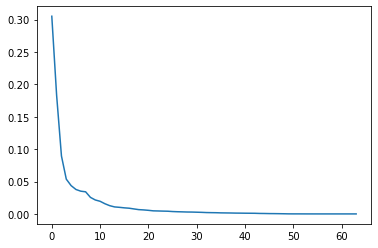

In [13]:
plt.plot(pca.explained_variance_ratio_)

In [14]:
print("%.2f" % pca.score(X_trn))

184.33


In [16]:
tst_tf = pca.transform(X_tst)

In [17]:
print(tst_tf)

[[ 4.22743519e+00  1.73040787e+01 -7.32085799e+00 ...  1.97596891e-16
  -6.17668054e-17  1.24778345e-16]
 [-1.93597610e+01  2.04984801e+00  3.09209183e+01 ...  3.46968343e-15
   1.47232906e-16  2.42771683e-16]
 [ 1.44337221e+01 -6.99789196e+00 -4.17640187e+00 ...  2.14885014e-15
  -4.35275116e-16  3.09121193e-16]
 ...
 [ 2.85262090e+01 -1.30259442e+00 -4.19307615e-01 ...  1.04304201e-15
  -9.91750303e-17 -2.39747187e-16]
 [-1.32941471e+01 -2.34088862e+01  2.15809729e+00 ... -2.39670765e-15
   6.13554817e-16  4.33642232e-16]
 [-2.14735687e+01 -7.64746170e+00 -3.94046858e+00 ... -4.16859232e-15
  -5.90920900e-17 -1.07477182e-16]]


<AxesSubplot:>

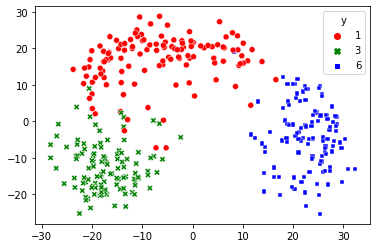

In [20]:
sns.scatterplot(x=tst_tf[:,0],y=tst_tf[:,1],style=y_tst,hue=y_tst,palette=['red','green','blue'])

In [21]:
print("%.2f" % pca.score(X_tst))

179.87


## 2- LINEAR DISCRIMINANT ANALYSIS (LDA) (Doğrusal Diskriminant Analizi)

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA

In [23]:
# Eğitim veri seti
trn = pd.read_csv('https://raw.githubusercontent.com/yasarkucukefe/YBS_405/main/data/optdigits_trn.csv')
X_trn = trn.filter(regex='\d')
y_trn = trn.y
# Test veri seti
tst = pd.read_csv('https://raw.githubusercontent.com/yasarkucukefe/YBS_405/main/data/optdigits_tst.csv')
X_tst = tst.filter(regex='\d')
y_tst = tst.y


In [25]:
trn.head()

,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P55,P56,P57,P58,P59,P60,P61,P62,P63,y
0,0,0,0,16,6,0,0,0,0,0,...,0,0,0,0,10,13,0,0,0,1
1,0,0,4,16,14,0,0,0,0,0,...,0,0,0,6,16,16,16,4,0,1
2,0,0,12,10,0,0,0,0,0,3,...,3,0,0,9,16,16,16,16,9,1
3,0,0,0,6,16,3,0,0,0,0,...,0,0,0,1,8,12,15,13,1,6
4,0,0,11,12,7,0,0,0,0,0,...,0,0,0,8,10,8,0,0,0,1


## LDA MODEL

In [26]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_trn, y_trn)

LinearDiscriminantAnalysis()

In [28]:
trn_tf = lda.transform(X_trn)

<AxesSubplot:>

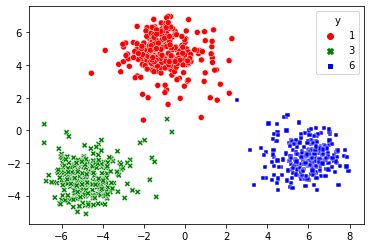

In [30]:
sns.scatterplot(x=trn_tf[:,0],y=trn_tf[:,1],style=y_trn,hue=y_trn,palette=['red','green','blue'])

In [37]:
print("Test verisi ile doğruluk oranı "+str("{:.2%}").format(lda.score(X_trn,y_trn)))

Test verisi ile doğruluk oranı 99.63%


In [ ]:
tst_tf = lda.transform(X_tst)
sns.scatterplot(x=tst_tf[:,0],y=tst_tf[:,1],style=y_tst,hue=y_tst,palette=['red','green','blue'])

In [36]:
print("Test verisi ile doğruluk oranı "+str("{:.2%}").format(lda.score(X_trn,y_trn)))

Test verisi ile doğruluk oranı 99.63%


## 3- t-SNE: t-DISTRIBUTED STOCHASTIC NEIGHBOR EMBEDING

https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding

https://distill.pub/2016/misread-tsne/

In [40]:
import pandas as pd                # For dataframe
import matplotlib.pyplot as plt    # For plotting data
import seaborn as sns              # For plotting data
from sklearn.manifold import TSNE  # TSNE analizi için

In [38]:
df = pd.read_csv('https://raw.githubusercontent.com/yasarkucukefe/YBS_405/main/data/optdigits.csv')
X = df.filter(regex='\d')
y = df.y

In [39]:
df.head()

,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P55,P56,P57,P58,P59,P60,P61,P62,P63,y
0,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6
1,0,0,0,3,16,11,1,0,0,0,...,0,0,0,0,2,14,14,1,0,1
2,0,0,7,11,11,6,0,0,0,9,...,0,0,0,14,16,12,10,1,0,3
3,0,0,9,13,1,0,0,0,0,0,...,5,0,0,4,15,16,16,16,16,1
4,0,0,0,10,12,0,0,0,0,0,...,0,0,0,1,11,14,12,1,0,6


## t-SNE MODEL

In [41]:
tsne = TSNE(n_components=2, perplexity=1, random_state=1)

Text(0.5, 1.0, 'Perplexity=1.0')

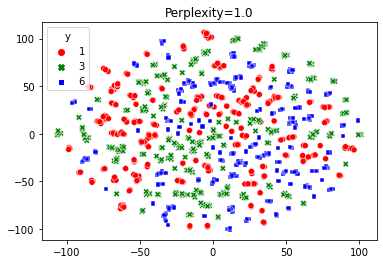

In [45]:
X_tf = tsne.fit_transform(X)

sns.scatterplot(x=X_tf[:,0],y=X_tf[:,1],style=y, hue=y, palette=['red','green','blue'])
plt.title("Perplexity=1.0")

Text(0.5, 1.0, 'Perplexity=2.0')

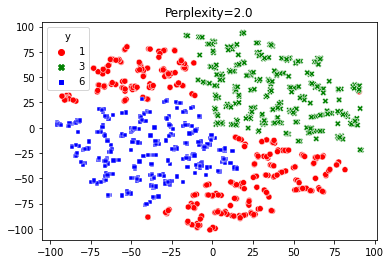

In [46]:
# Perplexity=2
tsne = TSNE(n_components=2, perplexity=2, random_state=1)
X_tf = tsne.fit_transform(X)
sns.scatterplot(x=X_tf[:,0],y=X_tf[:,1],style=y, hue=y, palette=['red','green','blue'])
plt.title("Perplexity=2.0")

Text(0.5, 1.0, 'Perplexity=5.0')

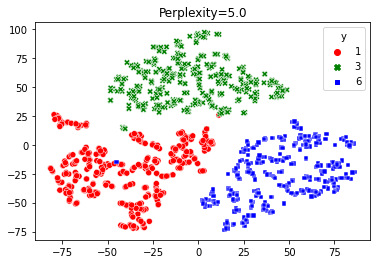

In [47]:
# Perplexity=5
tsne = TSNE(n_components=2, perplexity=5, random_state=1)
X_tf = tsne.fit_transform(X)
sns.scatterplot(x=X_tf[:,0],y=X_tf[:,1],style=y, hue=y, palette=['red','green','blue'])
plt.title("Perplexity=5.0")

Text(0.5, 1.0, 'Perplexity=50')

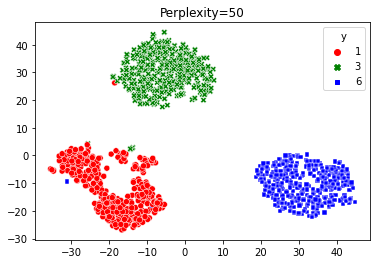

In [48]:
# Perplexity=50
tsne = TSNE(n_components=2, perplexity=50, random_state=1)
X_tf = tsne.fit_transform(X)
sns.scatterplot(x=X_tf[:,0],y=X_tf[:,1],style=y, hue=y, palette=['red','green','blue'])
plt.title("Perplexity=50")

In [49]:
# Kaggle.com PCA örneği: https://www.kaggle.com/asindico/customer-segments-with-pca